# 분류,군집 연습문제


## 문제 1

|변수| 설명 |구분|
|--|--|--|
|name| 오랜지, 자몽 여부 |종속|
|diameter |지름| 독립|
|weight |무게| 독립|
|red| 붉은 색상 정도| 독립|
|green |초록 색상 정도| 독립|
|blue |파란 색상 정도 |독립|

이 데이터셋을 활용하여 오랜지와 자몽을 분류할 수 있는 모델을 구성하고 성능 측정 결과를 제시하시오.


In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import silhouette_score

from sklearn.model_selection import cross_val_score
import warnings

warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('citrus.csv')
df.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [4]:
df['name'].value_counts()

name
orange        5000
grapefruit    5000
Name: count, dtype: int64

In [5]:
df.duplicated().sum()

0

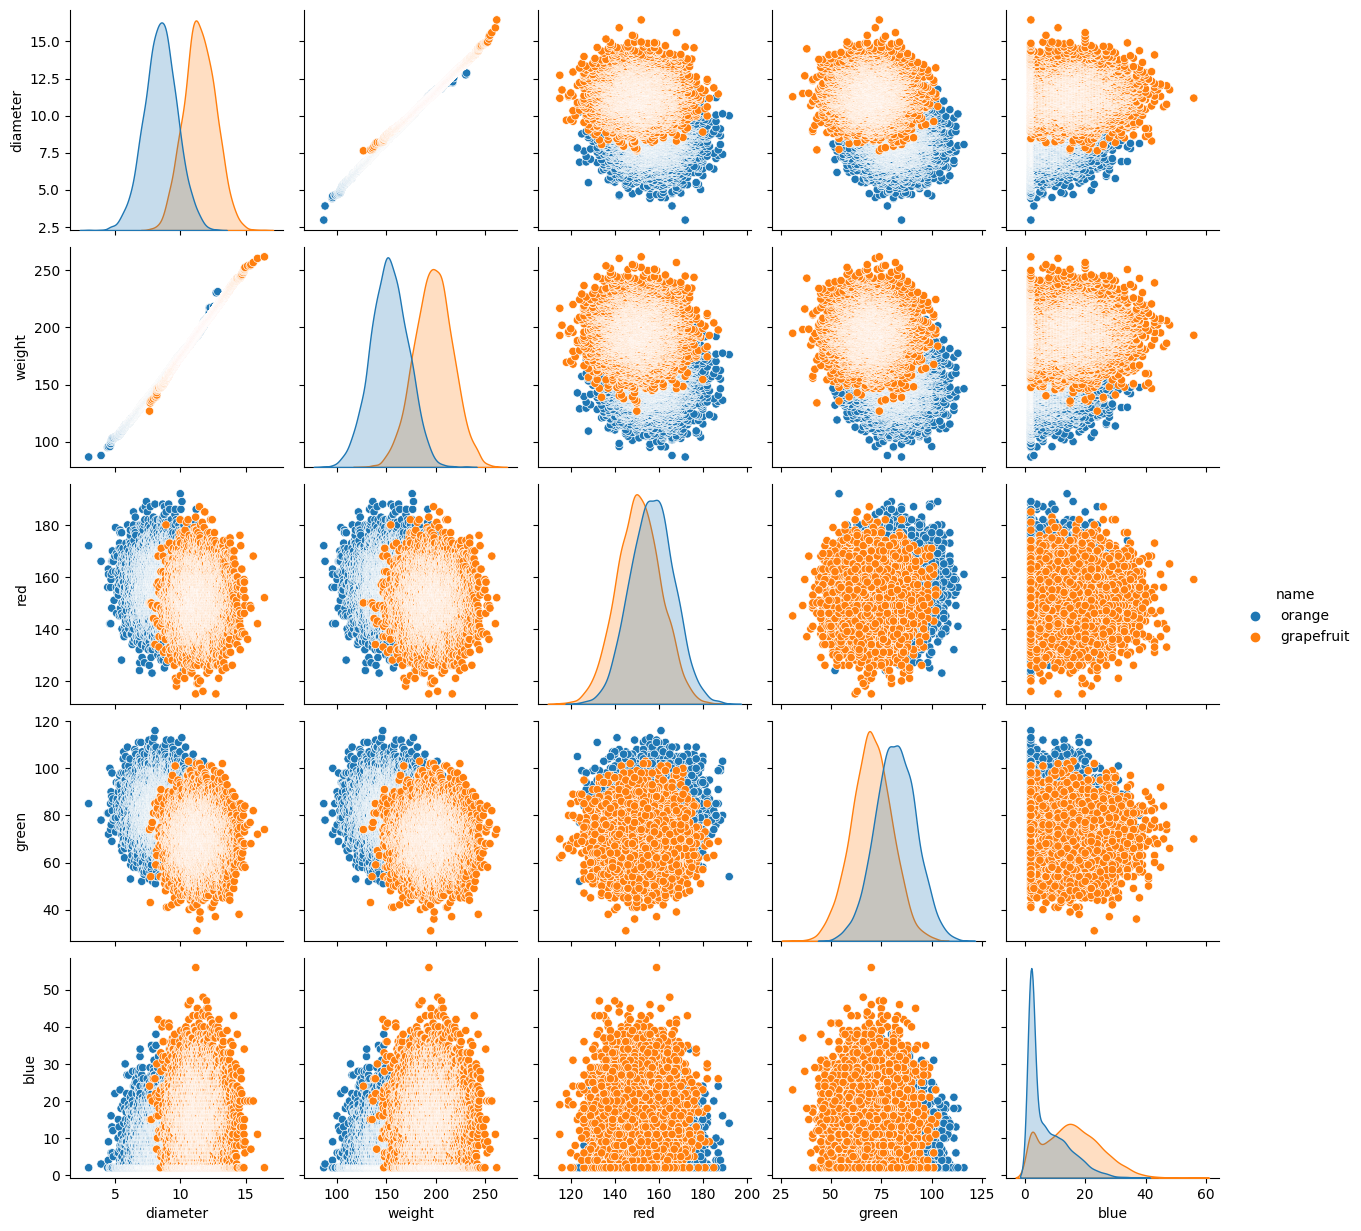

In [7]:
sb.pairplot(data=df,hue = 'name')

red랑 green은 걉치는 부분이 많음... red 랑 green 빼도 될거같은데

In [9]:
df.head()


,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


### 정규화 ㄱㄱ 

In [10]:
x = df.loc[:,'diameter':]
y = df[['name']]


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled,columns=x.columns)



In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size=0.3,random_state=312)


1만개는 너무 많아서 100까지만 했다 

Text(0, 0.5, 'Missclassification Rate')

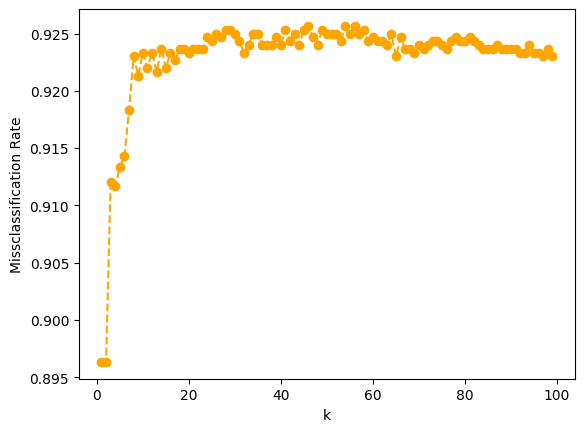

In [14]:
k_num = range(1,100)
accuracies = []
for k in k_num :
    knn = KNeighborsClassifier(n_neighbors=k,weights='distance')
    knn.fit(x_train,y_train)
    accuracies.append(knn.score(x_test,y_test))
# 그래프 옵션 설정
plt.plot(list(k_num),accuracies,'o--',color='orange')
plt.xlabel('k')
plt.ylabel('Missclassification Rate')



#### 최적의 k 찾기 -> 가장 높은 정확도 


In [16]:
max_acc = accuracies[0]
max_index = 0
for i in range(1,len(accuracies)):
    if max_acc <accuracies[i]:
        max_acc = accuracies[i]
        max_index = i

print("최대 정확도: {0}, 최대 정확도를 갖는 k: {1}".format(max_acc, max_index+1))
  

최대 정확도: 0.9256666666666666, 최대 정확도를 갖는 k: 46


> 최고의 정확도를 내는 k값을 찾은다음 그 안에서 kfold 교차검증으로 최적의 모델을 선택하는게 맞는거 같음

In [20]:
c = 10 
k_score = []
for i in range(2,c):
    cscore = cross_val_score(knn,x_test,y_test,cv=i,scoring='accuracy').max()
    k_score.append(cscore)

k_score

[0.9273333333333333,
 0.931,
 0.9333333333333333,
 0.935,
 0.934,
 0.9439252336448598,
 0.9413333333333334,
 0.9369369369369369]

k= 46이고 , cv = 7일때 최적임 

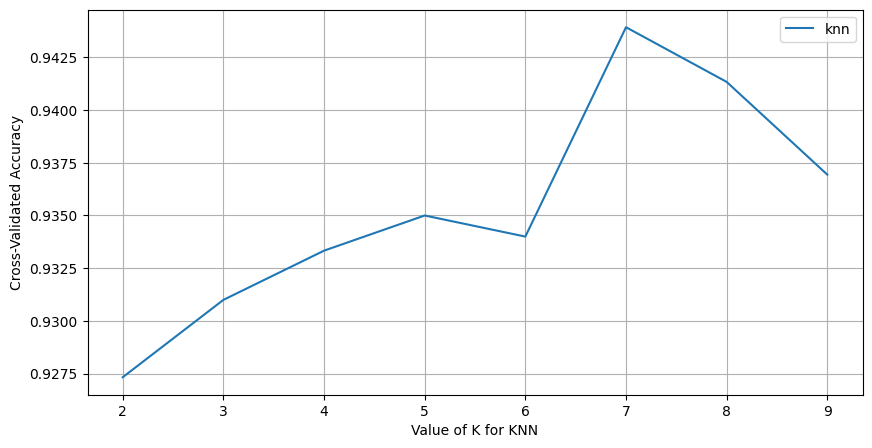

In [22]:
plt.figure(figsize=(10, 5))
sb.lineplot(x=range(2,10), y=k_score, label='knn')
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-Validated Accuracy")

plt.grid()
plt.show()
plt.close()

## 문제 2

In [23]:
df = pd.read_csv('citrus.csv')
df

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9
...,...,...,...,...,...,...
9995,grapefruit,15.35,253.89,149,77,20
9996,grapefruit,15.41,254.67,148,68,7
9997,grapefruit,15.59,256.50,168,82,20
9998,grapefruit,15.92,260.14,142,72,11


데이터 쓰던거 ㄱㄱ

In [25]:
x_test

,diameter,weight,red,green,blue
7625,0.635285,0.640172,0.064935,0.635294,0.000000
6241,0.570793,0.557997,0.532468,0.400000,0.296296
6943,0.604151,0.601831,0.363636,0.494118,0.166667
832,0.318755,0.274449,0.584416,0.623529,0.000000
3959,0.484062,0.467010,0.584416,0.552941,0.000000
...,...,...,...,...,...
4176,0.498147,0.484120,0.519481,0.552941,0.000000
4208,0.500371,0.487210,0.480519,0.564706,0.000000
729,0.310600,0.266724,0.506494,0.517647,0.018519
1426,0.357302,0.316280,0.402597,0.505882,0.611111


In [24]:
iner = [] 
for k in range(2,12):
    kmean = KMeans(n_clusters=k,random_state=332)
    kmean.fit(x_test)
    iner.append(kmean.inertia_)

iner


[205.50994853579888,
 175.7066977473092,
 158.1195300787894,
 143.735445561556,
 132.8505776656982,
 123.82770452199983,
 116.85481762648789,
 110.67731250331921,
 104.78148050175449,
 99.53820963513749]

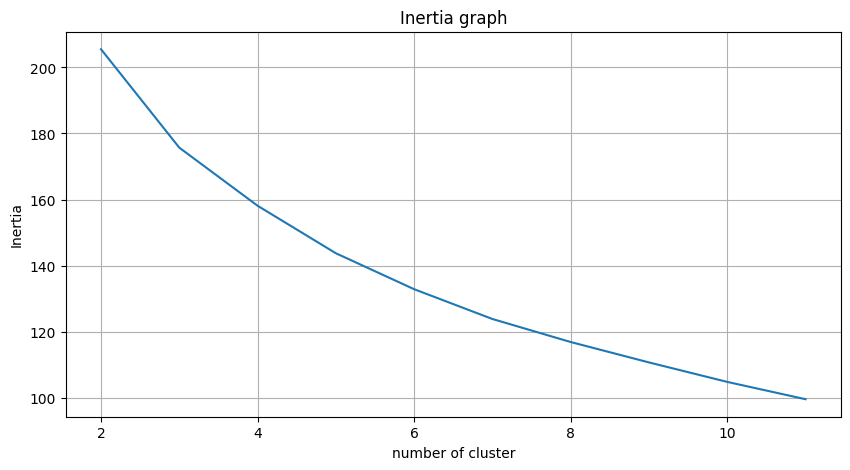

In [27]:
plt.figure(figsize=(10,5))
sb.lineplot(x=range(2,12),y=iner,markers='o')
plt.title('Inertia graph')
plt.xlabel('number of cluster')
plt.ylabel('Inertia')
plt.grid()
plt.show()
plt.close()

#### 실루엣계수

In [30]:
score_list= []

for k in range(2,12) : 
    kmean = KMeans(n_clusters=k,random_state=332)
    kmean.fit(x_test)
    y_pred = kmean.predict(x_test)
    si_score = silhouette_score(x_test,y_pred)
    score_list.append(si_score)
score_list

[0.3378096073184127,
 0.26517954176091096,
 0.23027084500536799,
 0.18849893033884466,
 0.18693632607903943,
 0.18382835239185788,
 0.17862041542815557,
 0.1773698652076774,
 0.18606438171983664,
 0.1861330418785993]

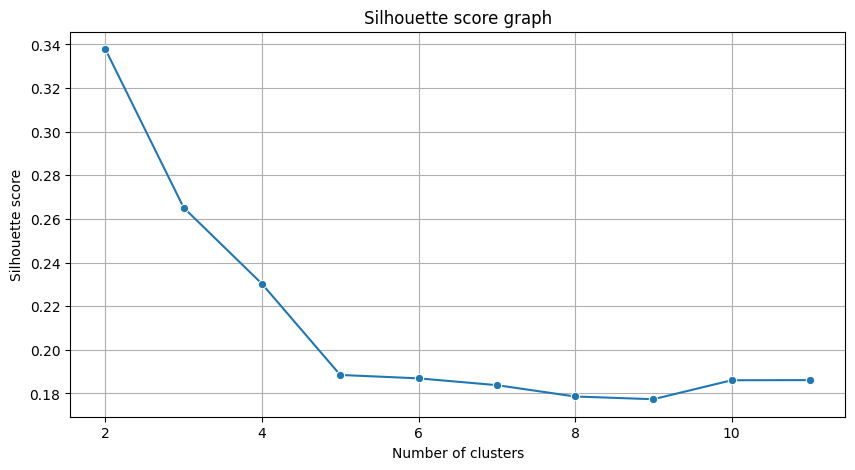

In [32]:
plt.figure(figsize=(10, 5))
sb.lineplot(x=range(2, 12), y=score_list, marker='o')
plt.title("Silhouette score graph")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.grid()
plt.show()
plt.close()